In [1]:
#let import the necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_wine

# Load the wine dataset
wine = load_wine()



In [4]:
# Print the shape of the data
print(wine.data.shape)


(178, 13)


In [5]:

# Print the first 5 rows of the data
print(wine.data[:5])



[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [6]:
# Print the names of the features
print(wine.feature_names)


['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [7]:

# Print the target values
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [9]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['label'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [10]:
np.bincount(df["label"])

array([59, 71, 48], dtype=int64)

In [11]:
#check the percentage representation of the classes
df.label.value_counts(normalize=True).round(3)

1    0.399
0    0.331
2    0.270
Name: label, dtype: float64

In [13]:
#check for null/missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

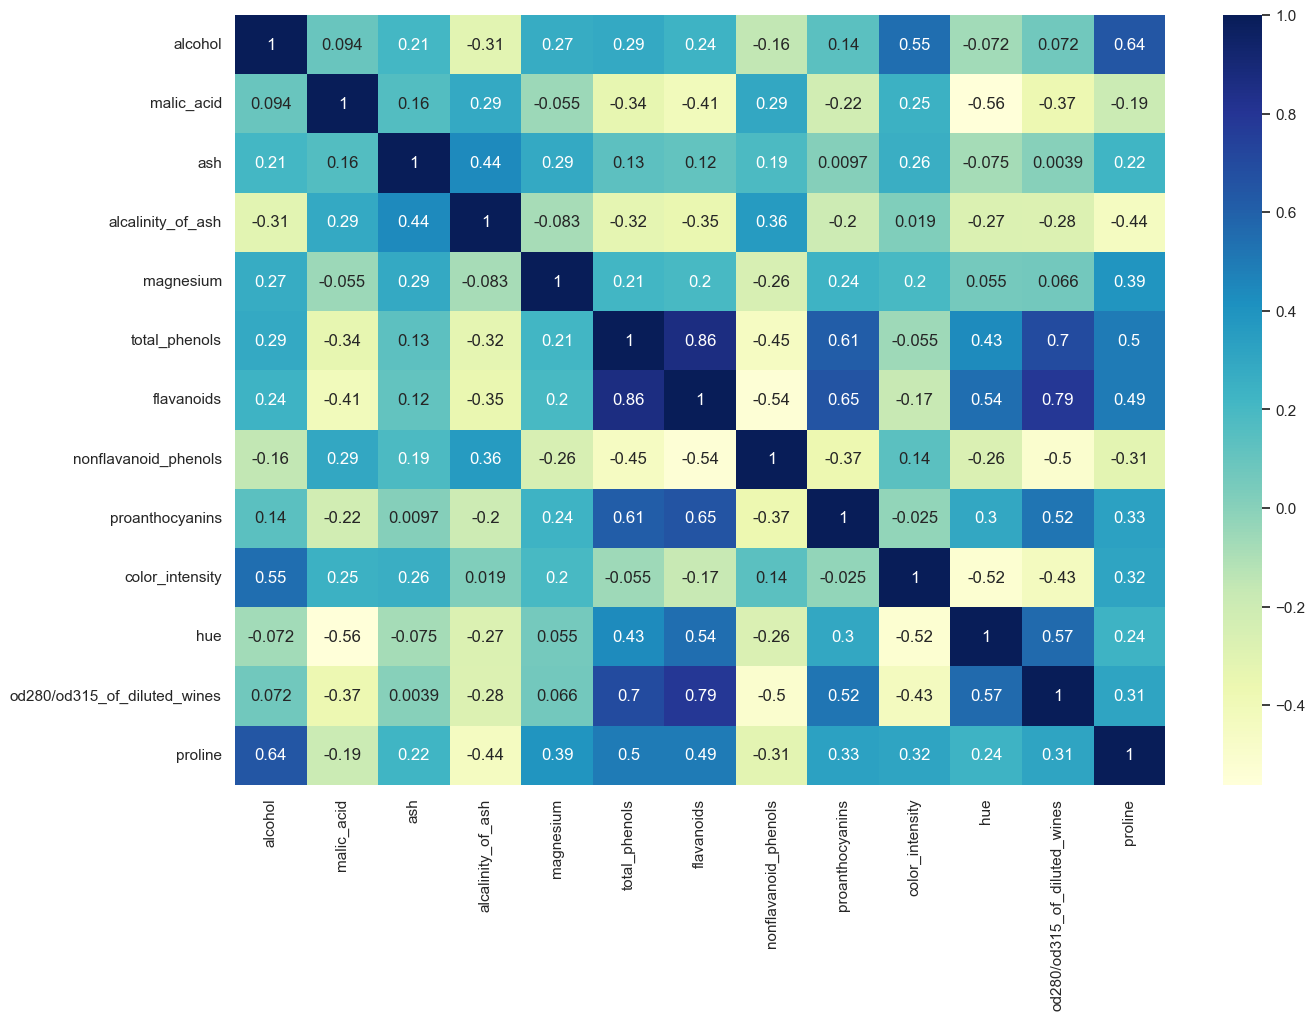

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.iloc[:,:-1].corr(), annot=True, cmap="YlGnBu")
plt.show()

Insights:Some features have quite high linear correaltion:

flavanoids / total phenols 0.86
flavanoids / od280/od315_of_diluted_wines 0.79
For example, if features reduction is needed, I can keep only flavanoids and not use the other two. However, I'll come back to this only if needed.

To have a better sense of the correlations let's also pairplot

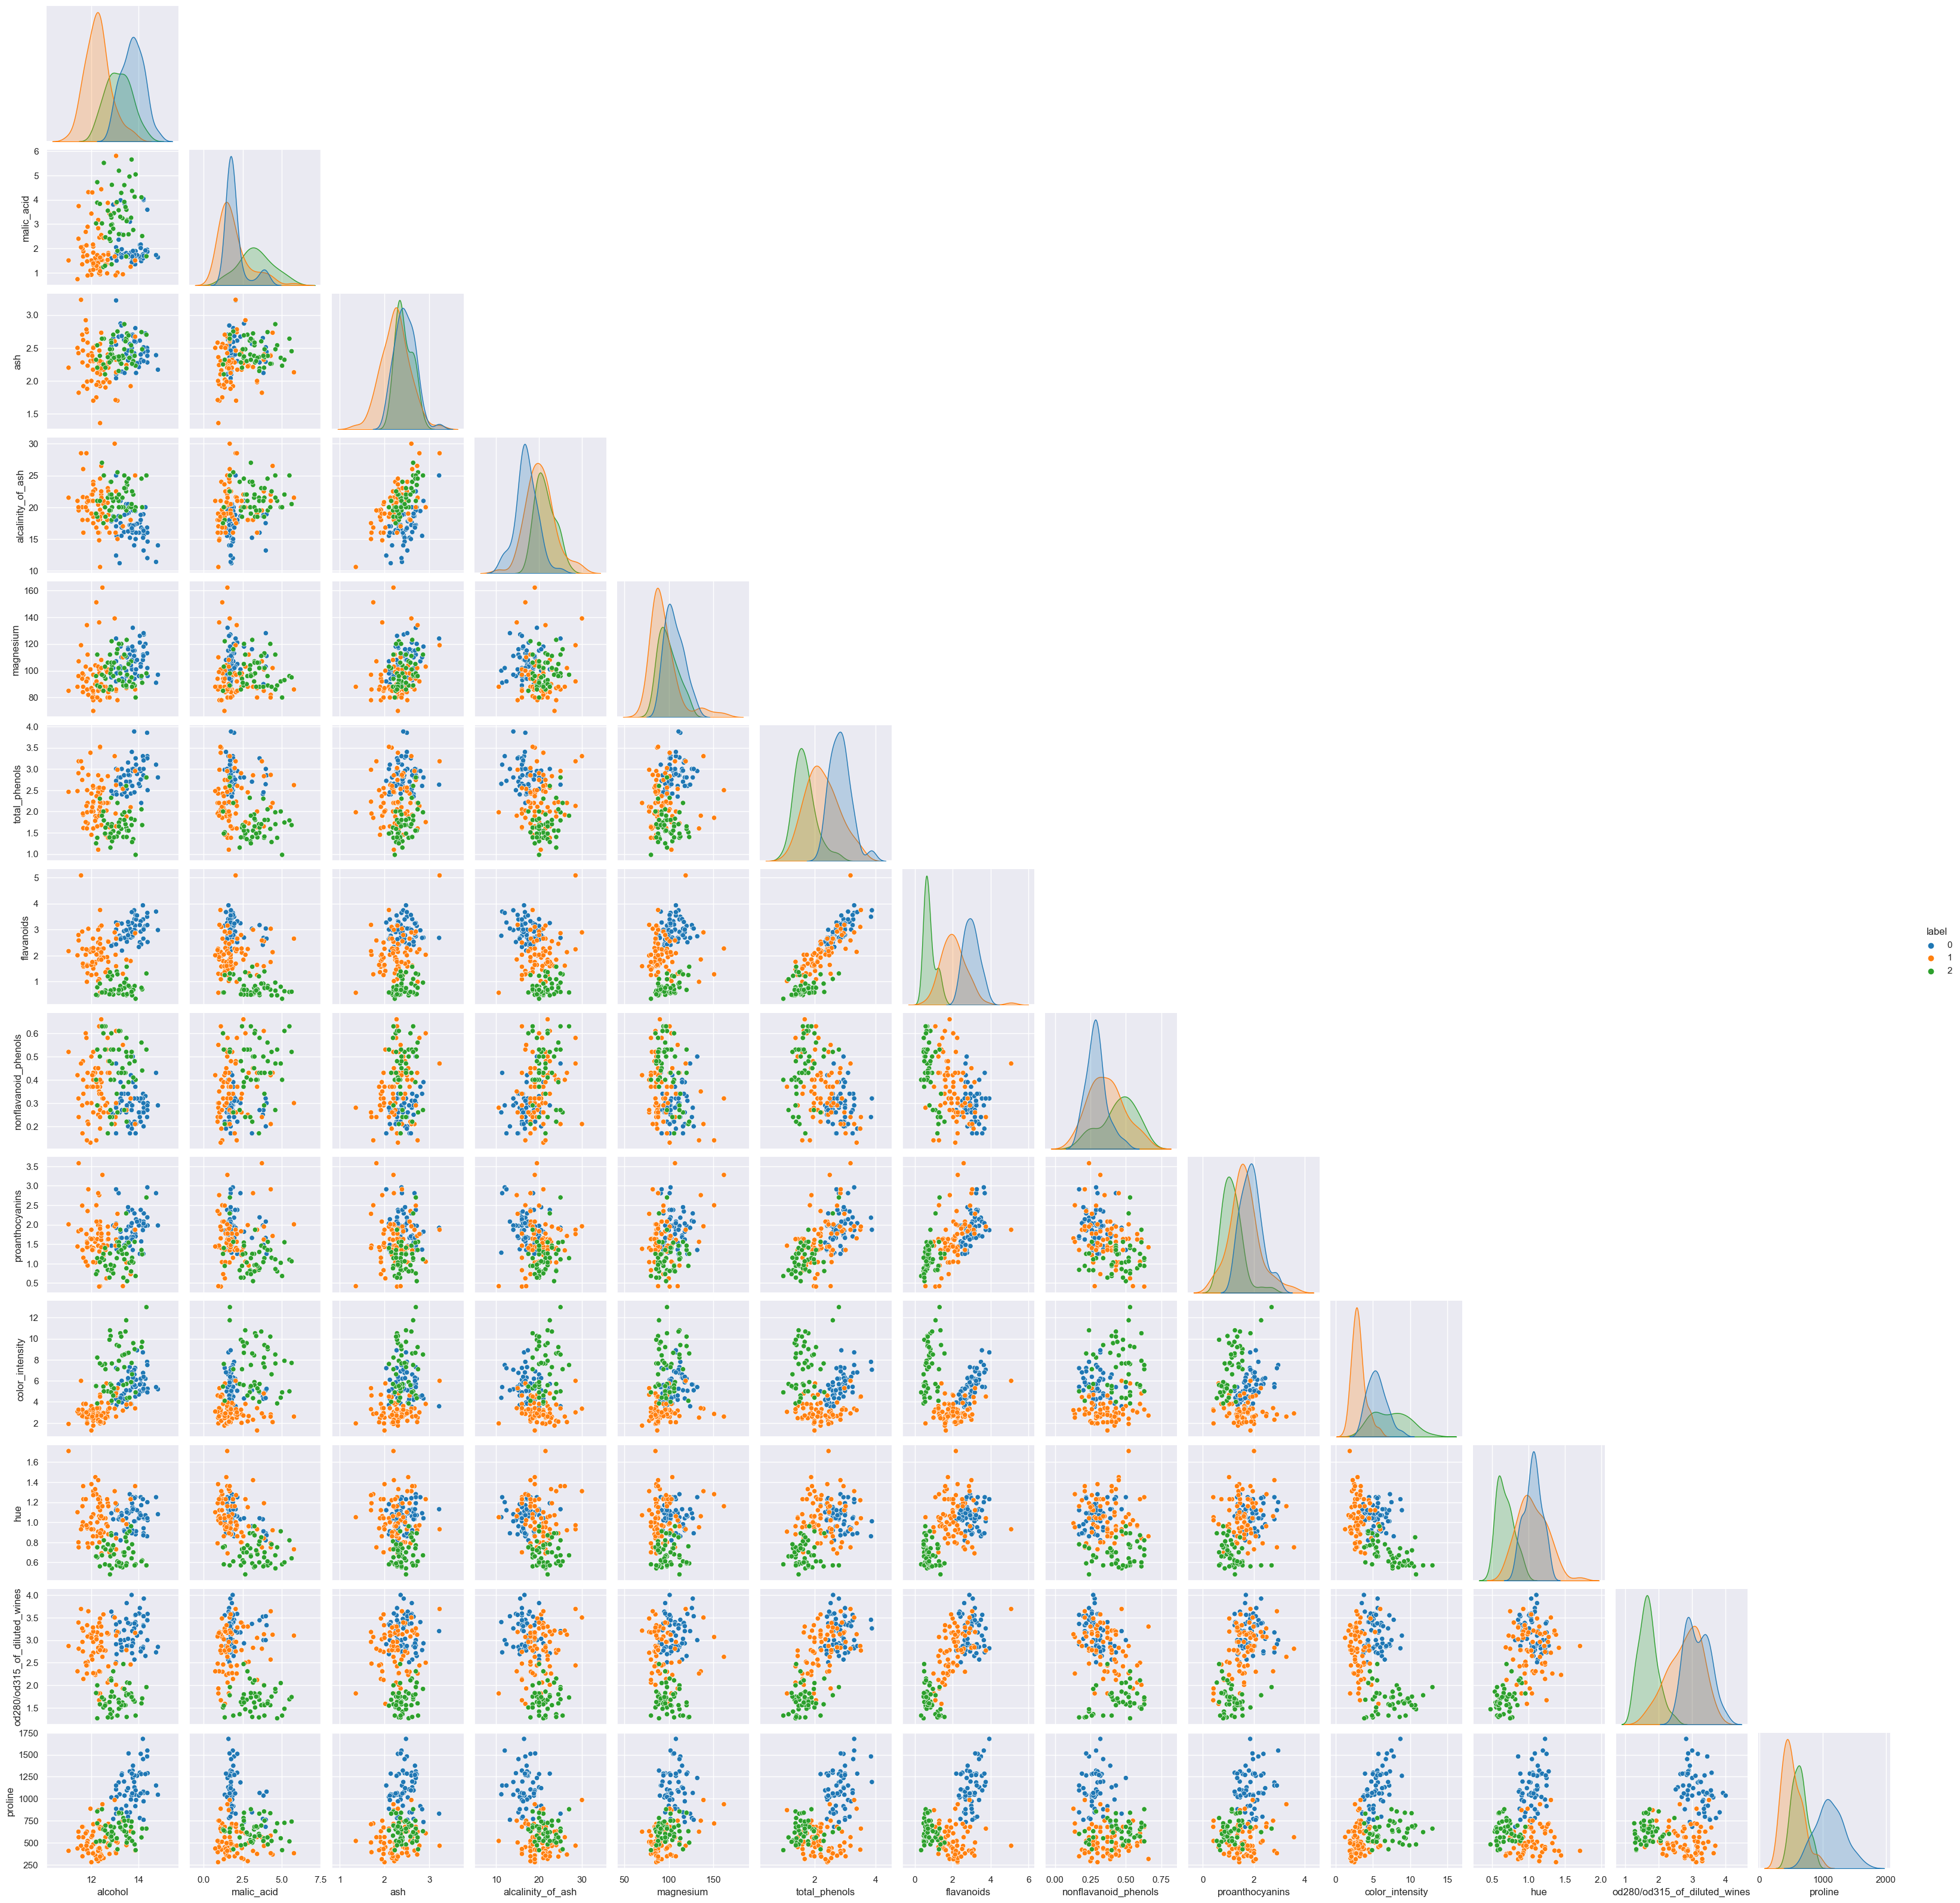

In [15]:
sns.pairplot(df, 
             hue='label', 
             palette="tab10", 
             corner=True)

plt.show()

Insights:I see that some features separate quite well the classes. For example, Proline seems to be a quite explicative variable itself, especially for wine 0 (blue dots). Also color intensity, coupled with total phenols or flavanoids separates quite well the classes.

I could eventually apply dimensionality reduction( for example with PCA we could reduce feature minimizing the loss of information).

PC	variance
---	--------
PC_1:	0.407
PC_2:	0.19
PC_3:	0.086
PC_4:	0.074
PC_5:	0.056
PC_6:	0.047
PC_7:	0.037
PC_8:	0.024
PC_9:	0.023
PC_10:	0.023
PC_11:	0.014
PC_12:	0.013
PC_13:	0.008


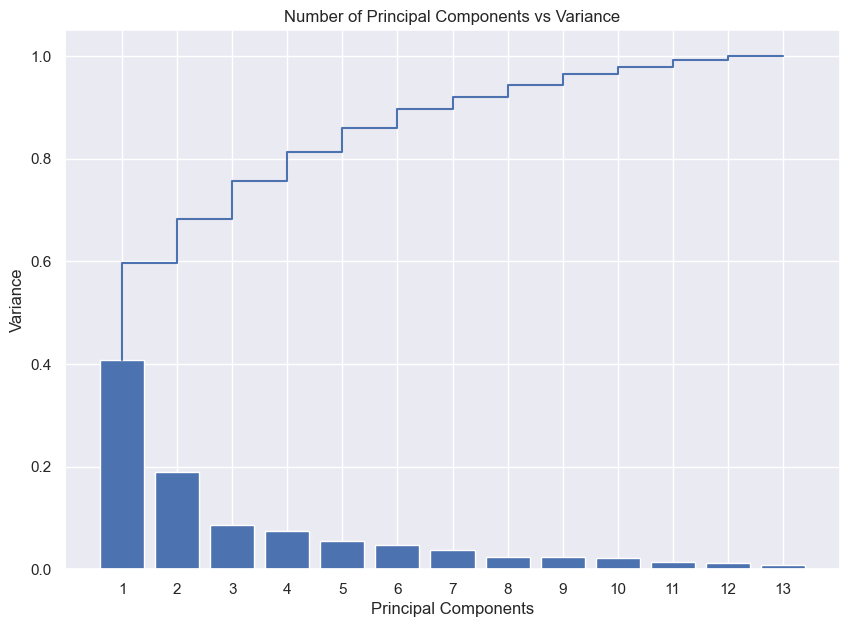

In [16]:
# I create X dataframe with features and y with the labels
X = df.drop('label', axis=1).values
y = df.label.values
# I apply feature scaling to the entire dataset in order to apply PCA to display the dataset
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X_sc = minmax.fit_transform(X)
# I determine percentage of variance for each principal component
from sklearn.decomposition import PCA
pc_range = np.arange(1,X_sc.shape[1] + 1)
pca = PCA(n_components=None)
pca.fit(X_sc)

plt.figure(figsize=(10,7))
plt.bar(pc_range, pca.explained_variance_ratio_)
plt.step(pc_range, np.cumsum(pca.explained_variance_ratio_))
plt.xticks(pc_range)
plt.xlabel("Principal Components")
plt.ylabel("Variance")
_ = plt.title("Number of Principal Components vs Variance")

print("PC\tvariance")
print("---\t--------")
for i,k in  enumerate(pca.explained_variance_ratio_):
    print('PC_{}:\t{}'.format(i+1, round(k, 3)))

The graph shows the percentage of variance for each principal component, as well as the cumulative variance. It can be seen that the first two principal components account for more than half of the total variance (while the first five, for example, account for more than 80%). I will come back to this in case there will be necessity of reduce the number of features and choose the more explicative ones. At the moment, I prefer to keep all the dataset which is already small and I do not want to lose information on the features.

In [17]:
df.describe().loc[['min', 'max']].T

,min,max
alcohol,11.03,14.83
malic_acid,0.74,5.80
ash,1.36,3.23
alcalinity_of_ash,10.60,30.00
magnesium,70.00,162.00
total_phenols,0.98,3.88
flavanoids,0.34,5.08
nonflavanoid_phenols,0.13,0.66
proanthocyanins,0.41,3.58
color_intensity,1.28,13.00


There are features that have much larger absolute maximum and minimum values than the others (such as 'proline'). Since I will be using the SVM algorithm (in this specific case SVC) for classification, I have to scale these values so that each feature has equal weight in the search for the best separation margin.

In [18]:
#First of all I divide the dataset into training and testing. 
#To maintain the class distribution ratio, I assign the labels array to 'stratify'
y = df["label"]
X = df.iloc[:,:-1]

from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, shuffle=True, random_state=0, stratify=y)

#scaling the data to equalise min and max of each feature
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# I do the scaler fitting on the training data only
#on the training test I do fit and transform simultaneously
X_train = scaler.fit_transform(X_train)

#now that the scaler has been trained on the training data, I do the transform on the test set
#The reason I fit the scaler using only the training data is because I don't want to bias the model with information from the test data.
X_test = scaler.transform(X_test)
#You should apply fit_transform on the training set and only transform on the validation/test set.
#This is done because the validation/test data is meant to emulate data the model has not seen before. 
#So to fit the validation/test data, we use what was fitted on the training data by using just transform, 
#which should also be applied to new data that will be fed into the model.

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.metrics import accuracy_score

# Create Decision Tree model
decision_tree_classifier = DecisionTreeClassifier(random_state=0)

# Define the parameter grid to search
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1, 20),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 20),
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(decision_tree_classifier, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=0, n_jobs=-1, verbose=1)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# Print the best parameters found by RandomizedSearchCV
best_params_decision_tree = random_search.best_params_

# Use the best model found by RandomizedSearchCV to make predictions on test set
y_pred_decision_tree = random_search.predict(X_test)

# Evaluate the model with the best parameters on test set
accuracy_test_decision_tree = accuracy_score(y_test, y_pred_decision_tree)

print("Best Parameters for Decision Tree:")
print(best_params_decision_tree)
print("\nTest Set Accuracy for Decision Tree with RandomizedSearchCV: {}".format(accuracy_test_decision_tree))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters for Decision Tree:
{'splitter': 'random', 'min_samples_split': 19, 'min_samples_leaf': 2, 'max_depth': 2, 'criterion': 'gini'}

Test Set Accuracy for Decision Tree with RandomizedSearchCV: 0.9259259259259259
